In [22]:
using Plots
using LaTeXStrings
using Distributions

# Lucas Schmidt Ferreira de Araujo

## Problem 04

One has the problem

$$ \frac{d}{dx} \left(  a(x)\frac{du}{dx} \right) = -f(x) $$

Then

$$ \left(  a(x)\frac{du}{dx}(x) \right) - \left(  a(0)\frac{du}{dx}(0) \right) = -\int_{0}^{x} f(x)dx$$

$$ a(x) = \frac{\left(-\int_{0}^{x} f(x)dx + \left(  a(0)\frac{du}{dx}(0) \right) \right)}{\frac{du}{dx}(x)} $$

We have

$$ f(x) = -1 ,\quad u(x) = x, \quad a(0)u'(0) = 0, \quad a(1)u'(1) = 1, \quad x \in (0,1) $$

$$ u_{\delta} = x + \delta \sin(x/\delta^2) $$

Then

$$ a(x) = x, \quad a_{\delta}(x) = \frac{\delta x}{\delta + \cos(x/\delta^2) }$$

In [14]:
f = -1
function u(x)
    return x
end

function uδ(x,δ)
    return u(x) + δ * sin(x / δ^2)
end 

function a(x)
    return x / 1
end

function aδ(x,δ)
    return x / (1 + cos(x/δ^2)/δ )
end

aδ (generic function with 1 method)

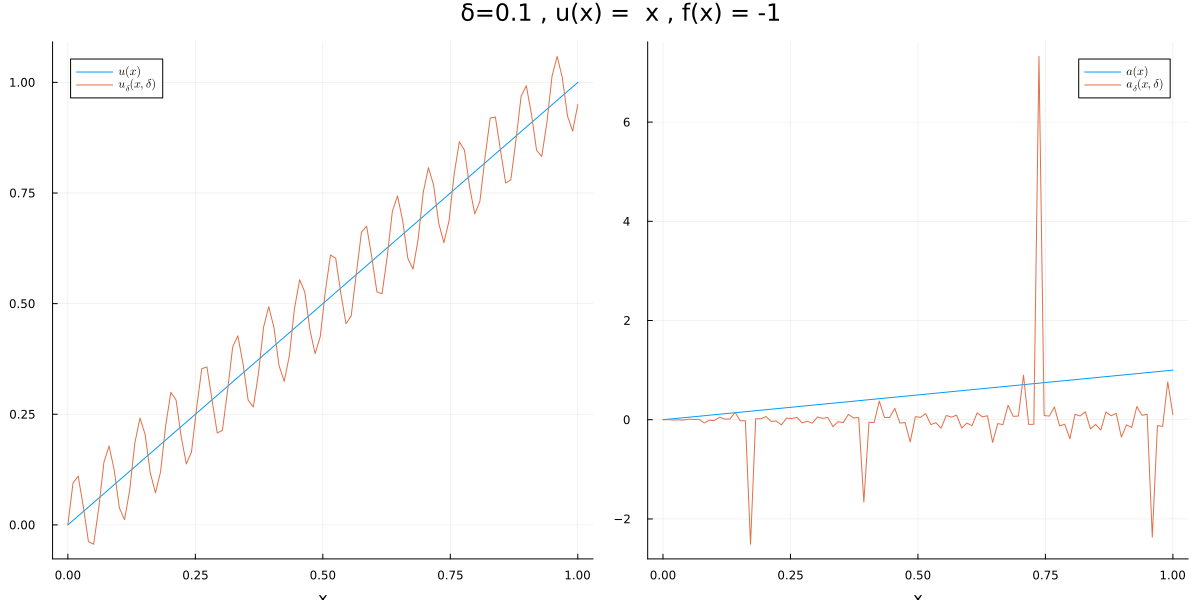

In [ ]:
N = 100
δ = .1
x = range(0,1,N)

p1 = plot(x,u.(x) , label = L"u(x)")
plot!(x,uδ.(x,Ref(δ)) , label = L"u_δ(x,δ)")

p2 = plot(x , a.(x) , label = L"a(x)")
plot!( x , aδ.(x , Ref(δ)) , label = L"a_δ(x,δ)")
plot( p1 , p2 , size = (1200,600) ,xlabel = "x" , suptitle = "δ=$(δ) , u(x) =  x , f(x) = -1")

## Problem 05

2. 
$$
\begin{cases} 
    u''(x) + 2 u'(x) + 5u(x) = 0 \\
    u(0) = 1, \quad u'(0) = -1
\end{cases}
$$

The solution is 

$$ u(x) =  e^{-x} \cos(2x) $$

3. 

We have 

$$  u''(x) + a u'(x) + bu = 0  $$

$$ \int_{0}^{x} u''ds + a\int_{0}^x u'ds + b \int_{0}^x u ds = 0 $$

$$ u'(x) - u'(0) + a( u(x) - u(0) ) + b \int_{0}^x u ds = 0 $$

After a second integration and using Fubbini theorem, one has

$$ u(x) - u_0 - u_1 x + a \int_{0}^{x}(u(t) - u_0)dt + b\int_{0}^x u(t)(x-t)dt = 0 $$

In [ ]:
m = 1 ; c = 2 ; k = 5

function u(x)
    return exp(-x) * cos(2*x)
end

function uδ(x , δ)
    dist = Uniform(-δ , δ)
    return u(x) + rand(dist)
end

uδ (generic function with 1 method)

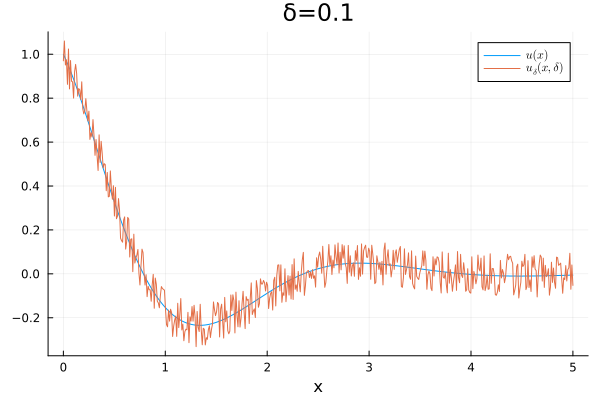

In [ ]:
x = range(0,5,N)
δ = .1

plot(x , u.(x) , label = L"u(x)" , xlabel = "x" , suptitle = "δ=$(δ)")
plot!(x , uδ.(x, Ref(δ) ) , label = L"u_δ(x,δ)")

The discretized equation is

$$ u_j - u_0 - u_1 x_j + ah \sum_{i = 1}^j(u_{i-\frac{1}{2}} - u_0) + b h\sum_{i=1}^j u_{i-\frac{1}{2}}(x_j - x_{i-\frac{1}{2}})= 0 $$

The problem into matrix form becomes

$$ \mathbf{U} - \mathbf{u_0} - u_1 \mathbf{x} + a \mathbf{W} + b \mathbf{V} = 0 $$

one has

$$ a \mathbf{W} + b \mathbf{V} = \mathbf{u_0} + u_1 \mathbf{x} - \mathbf{U} = \mathbf{y}$$

$$ \mathbf{A} \mathbf{\theta} = \mathbf{y}, \quad 
\mathbf{A} = \begin{bmatrix}
W & V
\end{bmatrix}, \quad \mathbf{\theta} = \begin{bmatrix}
a\\b
\end{bmatrix}$$

$$  \mathbf{\theta} =  ( \mathbf{A}^T  \mathbf{A})^{-1} \mathbf{A}^T \mathbf{y} $$

In [ ]:
function MPR( N , δ )
    u0 = 1 ; u1 = -1
    x = range(0,1,N)
    h = x[2] - x[1]

    w(j) = h * sum(  [ uδ( .5*h + h*i , δ ) - u0 for i = 0:j-2] )
    v(j) = h * sum( [ uδ( .5*h + h*i , δ) * ( x[j] - (.5*h + h*i) )  for i = 0:j-2 ] )

    W = [ w(j) for j = 2:N ]
    V = [ v(j) for j = 2:N ]
    U = [ uδ(x[j], δ) for j = 2:N ]
    X = [ x[j] for j = 2:N ]
    u0 = [u0 for j = 2:N ];
    A = hcat(W, V)
    y = - (U .- u0 .- u1 .* X)
    a_ , b_ = inv( transpose(A) * A ) * transpose(A) * y
    return a_ , b_
end

MPR (generic function with 1 method)

In [31]:
function u_back( a , b , x , u1 , u2)
    if a^2 - 4*b >= 0
        r1 = (-a + sqrt(a^2 - 4*b)) / 2
        r2 = (-a - sqrt(a^2 - 4*b)) / 2
        A1 = (u1 * r2 - u2 ) / (r2 - r1) 
        A2 = (u2 - u1 * r1) / (r2 - r1)
        return A1 * exp(r1 * x) + A2 * exp( r2 * x)
    else
        r1 = -a / 2
        r2 = sqrt(4*b - a^2) / 2
        A1 = u1
        A2 = (u1 + r1 * u1) / r2
        return exp(r1 * x) * (A1 * cos(r2 * x) + A2 * sin(r2 * x))
    end 
end

u_back (generic function with 1 method)

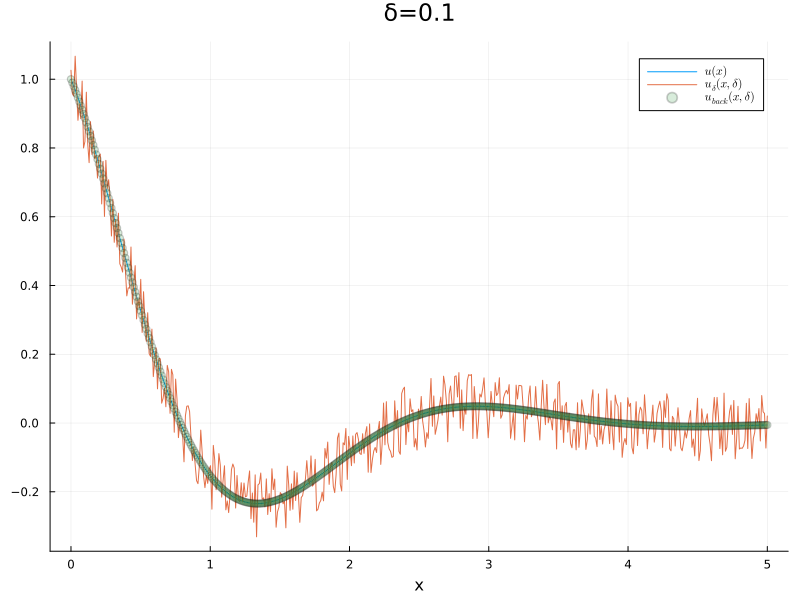

In [38]:
x = range(0,5,N)
δ = .1

plot(x , u.(x) , label = L"u(x)" , xlabel = "x" , suptitle = "δ=$(δ)" , size = (800,600))
plot!(x , uδ.(x, Ref(δ) ) , label = L"u_δ(x,δ)")
scatter!(x , u_back.(2,5,x,1,-1) , alpha = .2 , label = L"u_{back}(x,δ)")

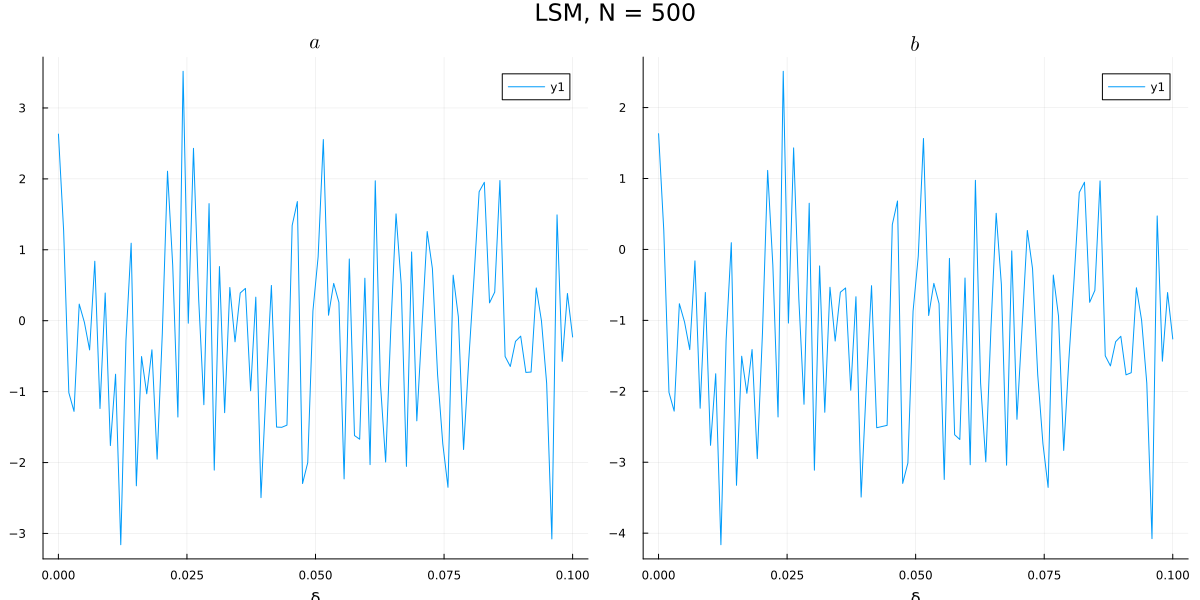

In [20]:
N = 500
δ = range(0.00001 , 0.1, 100)
a_ = zeros( length(δ) )
b_ = zeros( length(δ) )
for i in 1:length(δ)
    a_[i], b_[i] = MPR( N , δ[i] )
end

p1 = plot(δ , a_ , title = L"a")
p2 = plot(δ , b_ , title = L"b")
plot!(p1 , p2 , size = (1200,600) , xlabel = "δ" , suptitle = "LSM, N = $(N)")

4.
$$ \frac{du}{dx}(x_i) \approx \frac{u_{i+1} - u_{i-1}}{2h}$$

$$ \frac{d^2u}{dx^2}(x_i) \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} $$

The equation reads:

$$ \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} + a \frac{u_{i+1} - u_{i-1}}{2h} + b u_i = 0
 $$

 In matrix form one has

 $$ \mathbf{y} + a \mathbf{W} + b \mathbf{V} = 0$$

In [9]:
N = 1000
δ = 10e-10
function CDM( N , δ )
    x = range(0,1,N)
    h = x[2] - x[1]

    Y = [ (uδ( x[j+1] , δ ) - 2 * uδ( x[j] , δ ) + uδ( x[j-1] , δ )) / h^2 for j = 2:N-1] 
    W = [ (uδ( x[j+1] , δ ) - uδ( x[j-1] , δ )) / (2*h) for j = 2:N-1]
    V = [ uδ(x[j] , δ) for j = 2:N-1]
    A = hcat(W, V)
    a_ , b_ = inv( transpose(A) * A ) * transpose(A) * -Y
    return a_ , b_
end

CDM (generic function with 1 method)

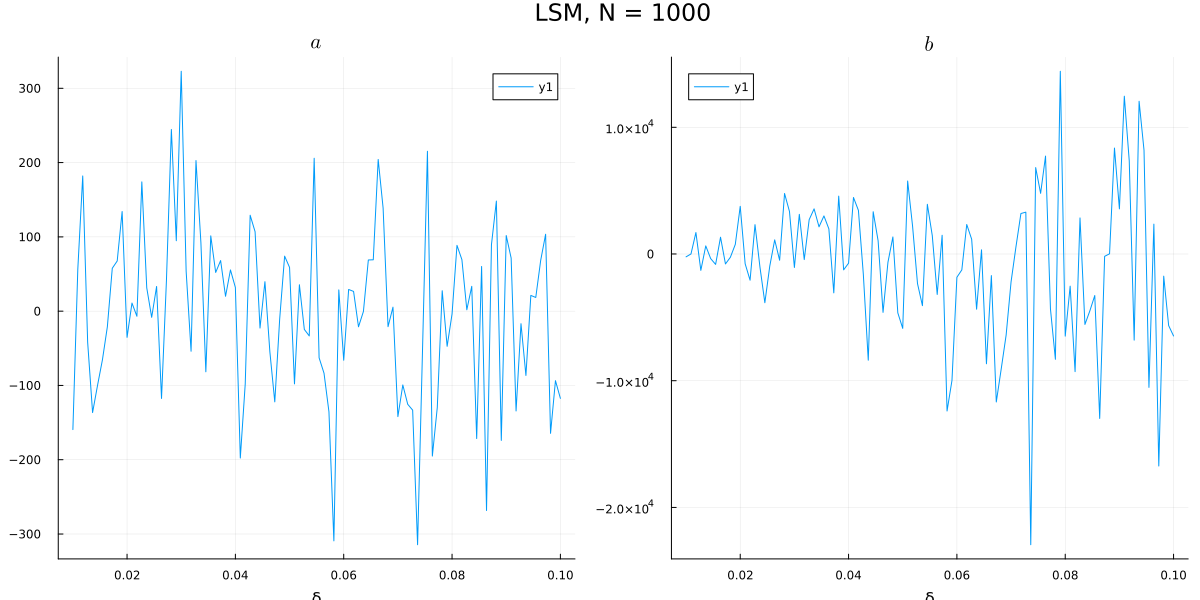

In [10]:
N = 1000
δ = range(0.01 , 0.1, 100)
a_ = zeros( length(δ) )
b_ = zeros( length(δ) )
for i in 1:length(δ)
    a_[i], b_[i] = CDM( N , δ[i] )
end
p1 = plot(δ , a_ , title = L"a")
p2 = plot(δ , b_ , title = L"b")
plot!(p1 , p2 , size = (1200,600) , xlabel = "δ" , suptitle = "LSM, N = $(N)")

In [12]:
function ode_system(y, x, a, b)
    u, v = y
    du = v
    dv = -a * v - b * u
    return [du, dv]
end

function rk4(f, y0, xspan, h, a, b)
    N = Int((xspan[2] - xspan[1]) / h) + 1
    x = range(xspan[1], xspan[2], length=N)
    Y = zeros(length(y0), N)
    Y[:, 1] = y0
    for i in 1:N-1
        k1 = f(Y[:, i], x[i], a, b)
        k2 = f(Y[:, i] + 0.5*h*k1, x[i] + 0.5*h, a, b)
        k3 = f(Y[:, i] + 0.5*h*k2, x[i] + 0.5*h, a, b)
        k4 = f(Y[:, i] + h*k3, x[i] + h, a, b)
        Y[:, i+1] = Y[:, i] + (h/6) * (k1 + 2k2 + 2k3 + k4)
    end
    return x, Y[1, :]  
end

function loss(a, b, x, uδ_vals, u0, u1, h)
    _, u = rk4(ode_system, [u0, u1], (x[1], x[end]), h, a, b)
    return 0.5 * sum((u - uδ_vals).^2)
end

function grad_loss(a, b, x, uδ_vals, u0, u1, h, eps=1e-6)
    J = loss(a, b, x, uδ_vals, u0, u1, h)
    J_a = loss(a + eps, b, x, uδ_vals, u0, u1, h)
    J_b = loss(a, b + eps, x, uδ_vals, u0, u1, h)
    dJ_da = (J_a - J) / eps
    dJ_db = (J_b - J) / eps
    return dJ_da, dJ_db
end

function gradient_descent(a_init, b_init, x, uδ_vals, u0, u1, h;
                          lr=1e-2, max_iter=500, tol=1e-6)
    a, b = a_init, b_init
    for iter in 1:max_iter
        dJ_da, dJ_db = grad_loss(a, b, x, uδ_vals, u0, u1, h)
        a_new = a - lr * dJ_da
        b_new = b - lr * dJ_db
        if abs(a_new - a) < tol && abs(b_new - b) < tol
            break
        end
        a, b = a_new, b_new
    end
    return a, b
end

u0 = 1.0
u1 = -1.0
a_true = 2.0
b_true = 5.0
δ = 0.5
h = 0.01
x = 0:h:2.0

# Generate noisy data uδ
uδ_vals = [uδ(xi, δ) for xi in x]

# Initial guess for parameters
a_init = 1.0
b_init = 1.0

a_est, b_est = gradient_descent(a_init, b_init, x, uδ_vals, u0, u1, h,
                               lr=0.1, max_iter=200)
println("a = ", a_est)
println("b = ", b_est)


a = 2.2197577627048872
b = 5.110553724601118
